## Week 13, Network Analysis Homework
UIS CSC 570R - Data Science Essentials<br>
2017 Fall<br>
Jason Burrell<br>
<br>
Based on https://github.com/mbernico/CS570/blob/master/module_3/network_analysis_homework.ipynb

In [1]:
import networkx as nx
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
M=nx.read_gml("polblogs.gml")

In [3]:
# create weighted graph from M
G = nx.Graph()
for u,v,data in M.edges_iter(data=True):
    if G.has_edge(u,v):
        G[u][v]['weight'] += 1
    else:
        G.add_edge(u, v, weight=1)



### 1.  Create a nice looking graph of the political blog network

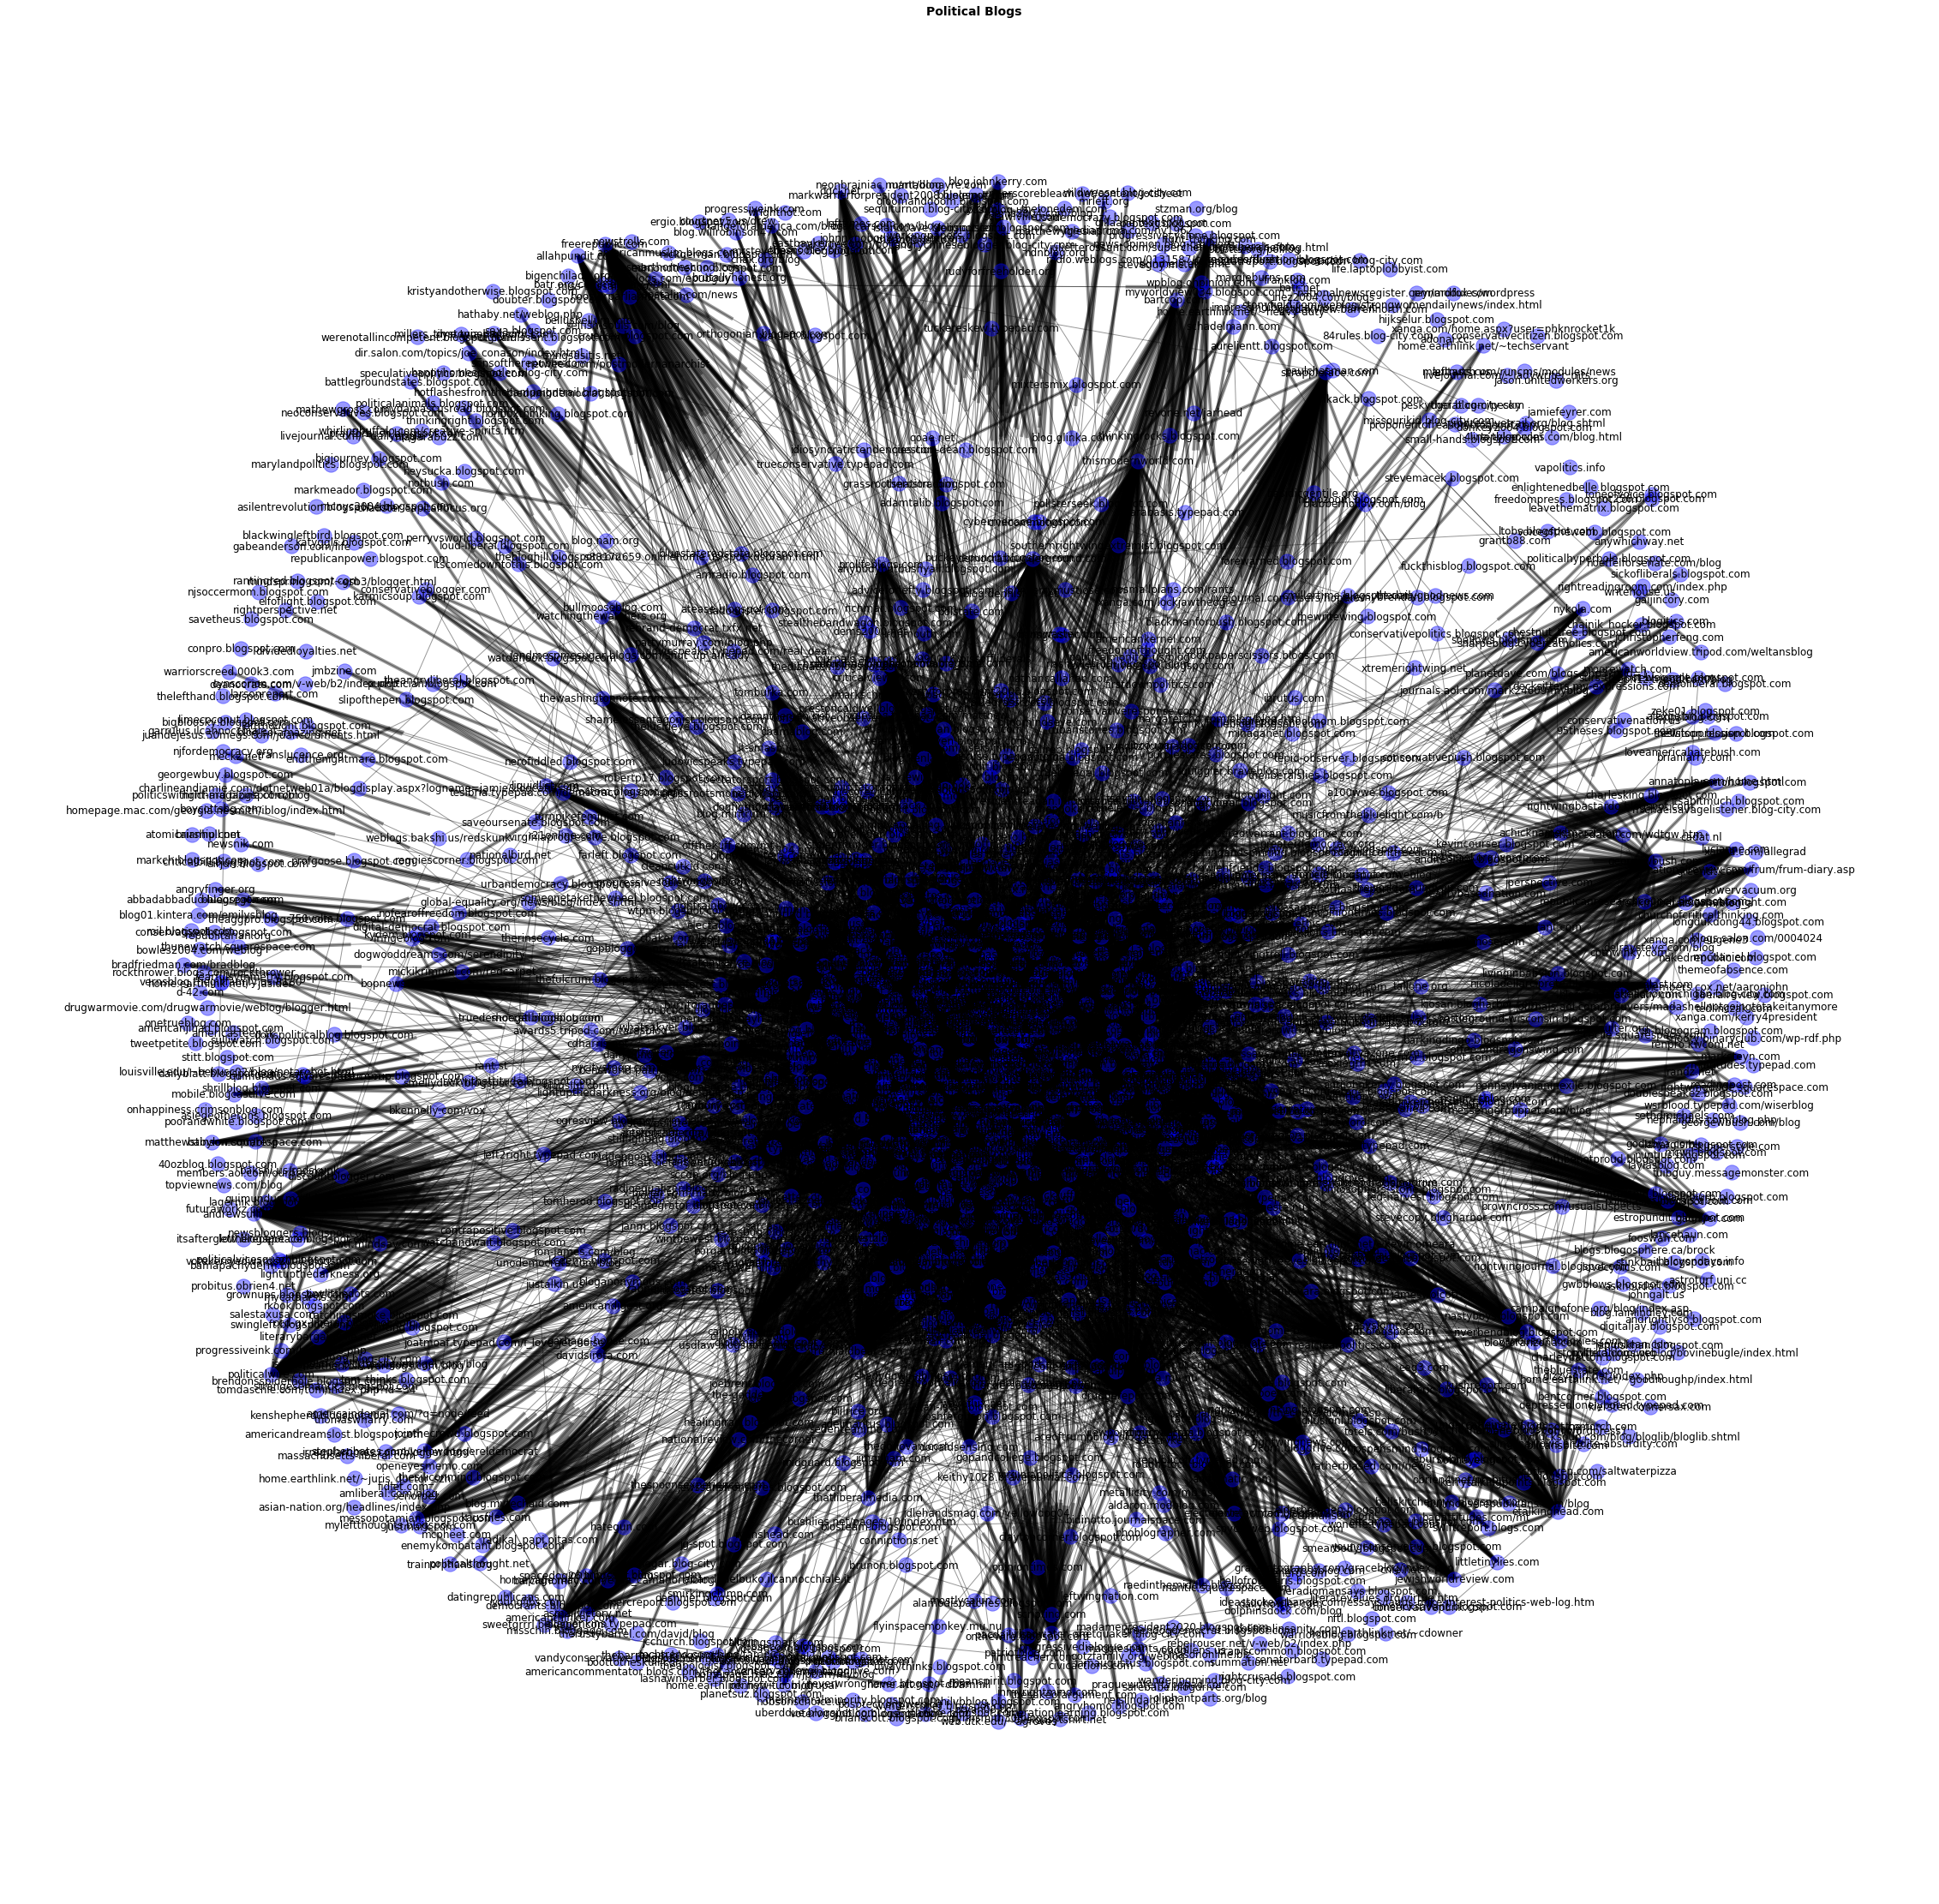

In [4]:
plt.figure(figsize=(40,40))
pos=nx.spring_layout(M, iterations=50, scale=5, k=.3)
nx.draw_networkx_labels(M,pos,fontsize=8)
font = {'color'      : 'k',
        'fontweight' : 'bold',
        'fontsize'   : 14}
plt.title("Political Blogs", font)

nx.draw_networkx_nodes(M,pos,node_color='b',alpha=0.4)
nx.draw_networkx_edges(M,pos,alpha=0.4,node_size=0,width=1,edge_color='k')
plt.axis('off')
plt.show()

### 2.  What are the 10 most influential blogs?

In [5]:
centrality=nx.eigenvector_centrality(G)

In [18]:
blog_list = []
for node in centrality:
    blog_list.append((node,centrality[node]))
    
blog_list.sort(key=lambda x: x[1], reverse=True)

In [19]:
blog_list[:10]

[('atrios.blogspot.com', 0.19480797936637684),
 ('dailykos.com', 0.1608974020523482),
 ('washingtonmonthly.com', 0.14653924259836862),
 ('digbysblog.blogspot.com', 0.1426436922171831),
 ('bodyandsoul.typepad.com', 0.14113489174330351),
 ('liberaloasis.com', 0.1395237157110786),
 ('tbogg.blogspot.com', 0.1370364169982425),
 ('corrente.blogspot.com', 0.1294175927409614),
 ('talkingpointsmemo.com', 0.12700519780790948),
 ('dneiwert.blogspot.com', 0.12237564692546019)]

### 3.  What are the 10 least influential blogs?



In [20]:
blog_list[-10:]

[('thingsasitis.net', 1.1736249650658601e-05),
 ('massachusetts-liberal.com', 9.4833652357345e-06),
 ('quimundus.squarespace.com', 6.061741218869528e-06),
 ('democratvoice.org', 1.0233388204113296e-06),
 ('batr.net', 6.796325594929456e-07),
 ('batr.org/commentary.html', 6.795517611554003e-07),
 ('quimundus.modblog.com', 6.682929975006485e-08),
 ('americanworldview.tripod.com/weltansblog', 7.491540638916238e-09),
 ('digital-democrat.blogspot.com', 1.7763251097559653e-72),
 ('thelonedem.com', 1.7763251097559653e-72)]

### 4.  Answer this question for both left wing and right wing blogs seperately.  (Optional 10 Extra Credit Points)